In [80]:
from scipy.spatial import KDTree, distance
import numpy as np
from pprint import pp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [81]:
# Example
points_ref = np.array([(1, 1), (3, 3), (4, 4), (5, 4), (6, 6)])
refTree = KDTree(points_ref)
idx = refTree.query_ball_point((4, 4), 2)
pp(idx)
pp(points_ref[idx])

[1, 2, 3]
array([[3, 3],
       [4, 4],
       [5, 4]])


In [82]:
ncol = 2
nZones = 6
nrows = nZones
idxStart = random.randint(100,200)
cols = [f"W{i+1}" for i in range(ncol)]
idx = [f"z{i+idxStart}" for i in range(nrows)]
X = pd.DataFrame(np.random.random(size=(nrows, ncol)), columns=cols, index=idx)
y = [f"C{i}" for i in range(nrows)]
y = pd.Series(y, index=idx)
y.name = "y"
zoneCentroid = pd.concat([y, X], axis=1)
zoneCentroid = zoneCentroid.sample(frac=1)
display(zoneCentroid)

,y,W1,W2
z147,C2,0.365717,0.935160
z145,C0,0.748794,0.142604
z150,C5,0.775480,0.935369
z148,C3,0.841764,0.218179
z146,C1,0.156740,0.601667
z149,C4,0.865613,0.896305


In [83]:
nrows = 200
idxStart = random.randint(100,200)
idx = [f"s{i+idxStart}" for i in range(nrows)]
X = pd.DataFrame(np.random.random(size=(nrows, ncol)), columns=cols, index=idx)
y = [f"U{i}" for i in range(nrows)]
y = pd.Series(y, index=idx)
y.name = "y"
ufp = pd.concat([y, X], axis=1)
display(ufp)

,y,W1,W2
s113,U0,0.274650,0.725768
s114,U1,0.668353,0.461692
s115,U2,0.992484,0.864062
s116,U3,0.642429,0.619961
s117,U4,0.536319,0.247281
...,...,...,...
s308,U195,0.192241,0.462611
s309,U196,0.076655,0.655341
s310,U197,0.838535,0.262002
s311,U198,0.667254,0.532668


<Axes: xlabel='W1', ylabel='W2'>

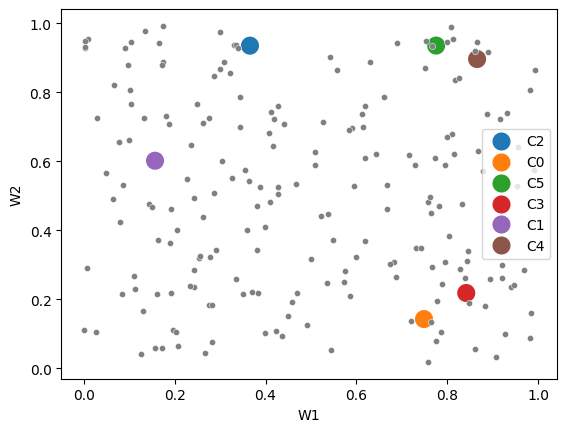

In [84]:
fig, ax = plt.subplots()
sns.scatterplot(zoneCentroid, x="W1", y="W2", hue="y", ax=ax, s=200)
sns.scatterplot(ufp, x="W1", y="W2", ax=ax, color="gray", s=20)

In [85]:
zoneCentroid[cols]

,W1,W2
z147,0.365717,0.935160
z145,0.748794,0.142604
z150,0.775480,0.935369
z148,0.841764,0.218179
z146,0.156740,0.601667
z149,0.865613,0.896305


In [86]:
zoneCentroid

,y,W1,W2
z147,C2,0.365717,0.935160
z145,C0,0.748794,0.142604
z150,C5,0.775480,0.935369
z148,C3,0.841764,0.218179
z146,C1,0.156740,0.601667
z149,C4,0.865613,0.896305


In [87]:
dfRefPts = zoneCentroid[cols]
srRefLabels = zoneCentroid["y"]
dfQueryPts = zoneCentroid[cols]

refTree = KDTree(dfRefPts)
distArr, idxArr = refTree.query(dfQueryPts, k=5)
pp(distArr)
pp(idxArr)

def rowIdxFn(row, label, removeSelf):
    if removeSelf:
        row = row.iloc[1:]    
    y = row.apply(lambda idx: label.iloc[idx] if idx < label.shape[0] else None)
    return y.values.tolist()

def rowDistFn(row, removeSelf):
    if removeSelf:
        row = row.iloc[1:]   
    row.replace([np.inf, -np.inf], None, inplace=True)
    return row.values.tolist()
    

dfIdx = pd.DataFrame(idxArr)
rIdx = dfIdx.apply(lambda row: rowIdxFn(row, srRefLabels, True), axis=1)
dfDist = pd.DataFrame(distArr)
rDist = dfDist.apply(lambda row: rowDistFn(row, True), axis=1)
display(rIdx)
display(rDist)



array([[0.        , 0.39355921, 0.40976354, 0.50140366, 0.86062927],
       [0.        , 0.11981225, 0.74917692, 0.76269979, 0.79321334],
       [0.        , 0.09823358, 0.40976354, 0.70299085, 0.72024616],
       [0.        , 0.11981225, 0.678545  , 0.72024616, 0.78506093],
       [0.        , 0.39355921, 0.70299085, 0.74917692, 0.76766638],
       [0.        , 0.09823358, 0.50140366, 0.678545  , 0.76269979]])
array([[0, 4, 2, 5, 3],
       [1, 3, 4, 5, 2],
       [2, 5, 0, 4, 3],
       [3, 1, 5, 2, 4],
       [4, 0, 2, 1, 5],
       [5, 2, 0, 3, 1]], dtype=int64)


0    [C1, C5, C4, C3]
1    [C3, C1, C4, C5]
2    [C4, C2, C1, C3]
3    [C0, C4, C5, C1]
4    [C2, C5, C0, C4]
5    [C5, C2, C3, C0]
dtype: object

0    [0.39355921429924456, 0.4097635444768392, 0.50...
1    [0.11981225088647388, 0.7491769217754155, 0.76...
2    [0.09823357500142615, 0.4097635444768392, 0.70...
3    [0.11981225088647388, 0.678545000682745, 0.720...
4    [0.39355921429924456, 0.7029908548990144, 0.74...
5    [0.09823357500142615, 0.5014036573289686, 0.67...
dtype: object

In [88]:
zoneCentroid["nnY"] = rIdx.values
zoneCentroid["nnDist"] = rDist.values
display(zoneCentroid)

,y,W1,W2,nnY,nnDist
z147,C2,0.365717,0.935160,"[C1, C5, C4, C3]","[0.39355921429924456, 0.4097635444768392, 0.50..."
z145,C0,0.748794,0.142604,"[C3, C1, C4, C5]","[0.11981225088647388, 0.7491769217754155, 0.76..."
z150,C5,0.775480,0.935369,"[C4, C2, C1, C3]","[0.09823357500142615, 0.4097635444768392, 0.70..."
z148,C3,0.841764,0.218179,"[C0, C4, C5, C1]","[0.11981225088647388, 0.678545000682745, 0.720..."
z146,C1,0.156740,0.601667,"[C2, C5, C0, C4]","[0.39355921429924456, 0.7029908548990144, 0.74..."
z149,C4,0.865613,0.896305,"[C5, C2, C3, C0]","[0.09823357500142615, 0.5014036573289686, 0.67..."


In [89]:
dfRefPts = ufp[cols]
srRefLabels = ufp["y"]
dfQueryPts = zoneCentroid[cols]
srQueryRadius = zoneCentroid["nnDist"].apply(lambda d: d[0]) 
srQueryRadius = srQueryRadius * 0.5  # Half distance to nearnest neighbor

def rowFn(row, refTree, refPts, refLabels):
    radius = row["radius"]
    pt = row.iloc[:-1]
    nnIdx = refTree.query_ball_point(pt, radius)
    
    refPtsSelected = refPts.iloc[nnIdx, :]
    refLabelSelected = refLabels.iloc[nnIdx]
    ptsQuery = pd.DataFrame([pt])
    resDist = distance.cdist(ptsQuery, refPtsSelected)
    nnDist = pd.Series(resDist[0], index=refPtsSelected.index, name="nnDist")
    dfRes = pd.concat([refLabelSelected, refPtsSelected, nnDist ], axis=1)
    dfRes = dfRes.sort_values(by="nnDist")
    
    return dfRes
   
refTree = KDTree(dfRefPts)
srQueryRadius.name = "radius"
dfQueryPtsRadius = pd.concat([dfQueryPts, srQueryRadius], axis=1)
nb = dfQueryPtsRadius.apply(lambda row: rowFn(row, refTree, dfRefPts, srRefLabels), axis=1)



In [90]:
nb.iloc[0]

,y,W1,W2,nnDist
s297,U184,0.338673,0.927121,0.028213
s280,U167,0.333927,0.938467,0.031962
s254,U141,0.330839,0.937897,0.034985
s258,U145,0.308440,0.886962,0.074857
s219,U106,0.299672,0.973520,0.076377
s282,U169,0.322619,0.855625,0.090461
s298,U185,0.299447,0.868784,0.093794
s208,U95,0.286138,0.848608,0.117576
s197,U84,0.344055,0.785002,0.151713
s244,U131,0.540771,0.901059,0.178345


C:\Users\nnnpo\AppData\Local\Temp\ipykernel_4608\812162817.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfNb = nb[i]
C:\Users\nnnpo\AppData\Local\Temp\ipykernel_4608\812162817.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfNb = nb[i]
C:\Users\nnnpo\AppData\Local\Temp\ipykernel_4608\812162817.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfNb = nb[i]
C:\Users\nnnpo\AppData\Local\Temp\ipykernel_4608\812162817.py:6:

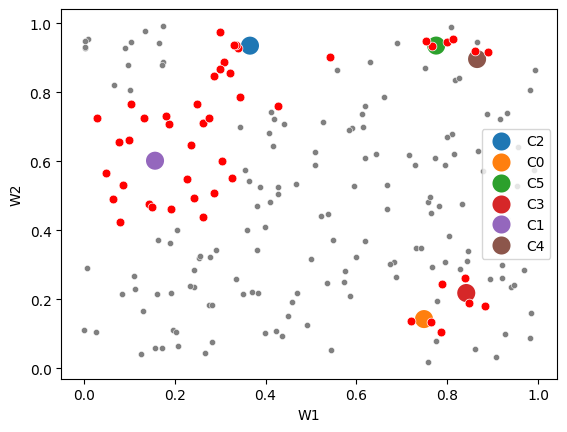

In [91]:
fig, ax = plt.subplots()
sns.scatterplot(zoneCentroid, x="W1", y="W2", hue="y", ax=ax, s=200)
sns.scatterplot(ufp, x="W1", y="W2", ax=ax, color="gray", s=20)

for i in range(zoneCentroid.shape[0]):
    dfNb = nb[i]
    nPoints = ufp[cols].loc[dfNb.index, :]
    sns.scatterplot(nPoints, x="W1", y="W2", ax=ax, color="red", s=40)